In [3]:
import qcodes as qc
import transitions
from importlib import reload
reload(transitions )
from transitions import *

In [34]:
data = qc.load_data('CSD/2018-03-26/#004_4D_DC_TGAC_DBL_DBR_14-51-19')
# data = qc.load_data('CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17')
data

DataSet:
   location = 'CSD/2018-03-26/#004_4D_DC_TGAC_DBL_DBR_14-51-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | DC_control_DFR_set  | DFR          | (3,)
   Setpoint | DC_control_DFL_set  | DFL          | (3, 3)
   Setpoint | DBL_DBR_set         | DBL_DBR      | (3, 3, 301)
   Setpoint | DC_control_TGAC_set | TGAC         | (3, 3, 301, 251)
   Measured | DC_voltage          | DC_voltage   | (3, 3, 301, 251)

In [45]:
# importing data
DB = data.DBL_DBR_set[1,1,:]
TG = data.DC_control_TGAC_set[1,1,1,:]
Z = data.DC_voltage[0,2,:,:] #change these values for different datasets
Z = np.swapaxes(Z,0,1)
#00 none 
#01 one clear
#02 three clear
#10 four clear
#11 five messy
#12 seven ok clarity. See this one for two transitions crossing clearly
#20 five messy at end
#21 six messy
#22 seven clearish

DB = DB[150:300]
TG = TG[0:125]
Z = Z[0:125,150:300]



# DB = data.DBL_DBR_set[1,1,:]
# TG = data.DC_control_TGAC_set[1,1,1,:]
# Z = data.DC_voltage[0,1,:,:] #change these values for different datasets
# Z = np.swapaxes(Z,0,1)
#00 none 
#01 one clear
#02 three clear
#10 four clear
#11 five messy
#12 seven ok clarity. See this one for two transitions crossing clearly
#20 five messy at end
#21 six messy
#22 seven clearish

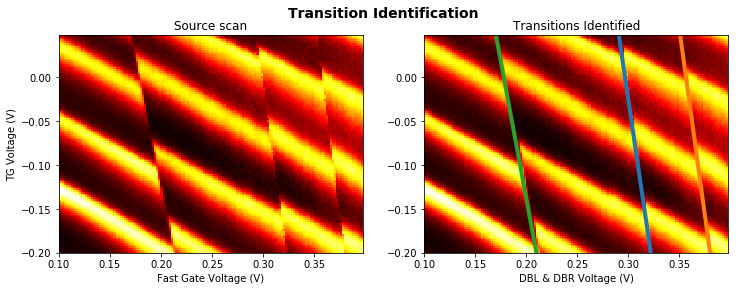

[{'gradient': -7.9333333333333886,
  'gradient_error': 6.6964285714285694,
  'intensity': 0.7791751279238518,
  'location': 0.32200000000000001},
 {'gradient': -8.5000000000000586,
  'gradient_error': 7.1794871794871762,
  'intensity': 0.7690648088303581,
  'location': 0.38},
 {'gradient': -6.263157894736886,
  'gradient_error': 5.2777777777777812,
  'intensity': 0.63642218349097057,
  'location': 0.20999999999999999}]

In [52]:
import transitions

# DB = Donor gate voltage array
# TG = Top gate voltage array
# Z  = Charge stability diagram with axes [DB,TG]

transitions = find_transitions(DB,TG,Z,plot='Simple')
display(transitions)